In [1]:
#import the dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# vectorize the input
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
# use one ht encoding for the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [0]:
from keras import models
from keras import layers

# Define the structure of the model 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# use softmax for the last layer

In [0]:
# Compile the model, configure the optimizer
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
# Split the training set for hyperparameter tuning. 
# Here we try to tune the ideal number of epochs to get the best result

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# Training Phase. Record the accuracy and error/loss for tuning later on
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 350us/step - loss: 2.1991 - acc: 0.5380 - val_loss: 1.4432 - val_acc: 0.6650
Epoch 2/20
7982/7982 [==============================] - 2s 306us/step - loss: 1.1185 - acc: 0.7437 - val_loss: 1.1555 - val_acc: 0.7310
Epoch 3/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.7859 - acc: 0.8205 - val_loss: 1.0157 - val_acc: 0.7790
Epoch 4/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.5466 - acc: 0.8791 - val_loss: 0.9962 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 2s 302us/step - loss: 0.3857 - acc: 0.9181 - val_loss: 1.0121 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 2s 303us/step - loss: 0.2722 - acc: 0.9406 - val_loss: 0.8973 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 2s 304us/step - loss: 0.2245 - acc: 0.9466 - val_loss: 1.0595 - val_acc: 0.7880


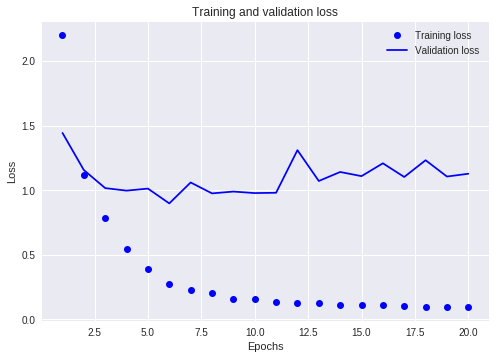

In [17]:
# Plotting the training and validation loss for tuning the number of epochs
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

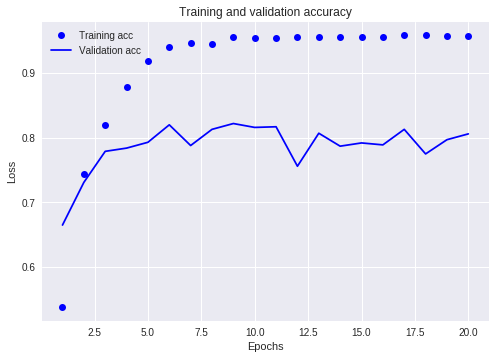

In [18]:
# Plotting the accuracy curves

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [19]:
# The ideal number of epochs looks to be 6. So retrain the model using all the
# training examples

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          one_hot_train_labels,
          epochs=6,
          batch_size=512)
# make prediction on unseen data now - test data
predictions = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/6
8982/8982 [==============================] - 3s 372us/step - loss: 2.0618 - acc: 0.5547
Epoch 2/6
8982/8982 [==============================] - 3s 309us/step - loss: 1.0416 - acc: 0.7733
Epoch 3/6
8982/8982 [==============================] - 3s 306us/step - loss: 0.7221 - acc: 0.8407
Epoch 4/6
8982/8982 [==============================] - 3s 303us/step - loss: 0.4896 - acc: 0.8903
Epoch 5/6
8982/8982 [==============================] - 3s 304us/step - loss: 0.3618 - acc: 0.9179
Epoch 6/6
2246/2246 [==============================] - 1s 298us/step


In [20]:
predictions

[0.9857225294953887, 0.8005342832231565]